# Measured Temperatures Analysis

First of all, you must import the libraries/modules needed.

In [7]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calibration_stats import get_cropped_dataset, get_device_name

with open("calibration.json", "r") as f:
    CALIBRATION_DICT = json.load(f)

Then you must run the following block of code which contains some utility functions that will be used in the future.

In [8]:
def compute_dataframes(dataset):
    for mac_addr in dataset.keys():
        calibration = lambda t: t + CALIBRATION_DICT[get_device_name(mac_addr)]
        df = pd.DataFrame(
            data={
                "Timestamp": dataset[mac_addr]["timestamps"],
                "Temperature": list(
                    map(calibration, dataset[mac_addr]["samples"]))
            })

        df.index = df["Timestamp"]
        df_p = df.resample("H").mean()
        df_p.reset_index(level=0, inplace=True)
        dataset[mac_addr]["df"] = df_p


def plot_charts(dataset):
    for mac_addr in dataset.keys():
        fig, ax = plt.subplots()
        x = dataset[mac_addr]["df"].loc[:, "Timestamp"]
        y = dataset[mac_addr]["df"].loc[:, "Temperature"]

        ax.set_xlabel('Real-Time (1h Intervals)')
        ax.set_ylabel('Avg Measured Temperature (°C)')
        
        ax.set_title(
            f'{get_device_name(mac_addr)}: Measured Temperatures v/s Time')
        ax.scatter(x, y, color="orange", edgecolors="black", zorder=3)
        ax.plot(x, y, color="orange")
        fig.autofmt_xdate()
        plt.ticklabel_format(axis="y", useOffset=False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.show()

Once thats done you need to enter the name of the `.csv` file with the raw data that the motes sent to the manager.

Please enter the raw data file


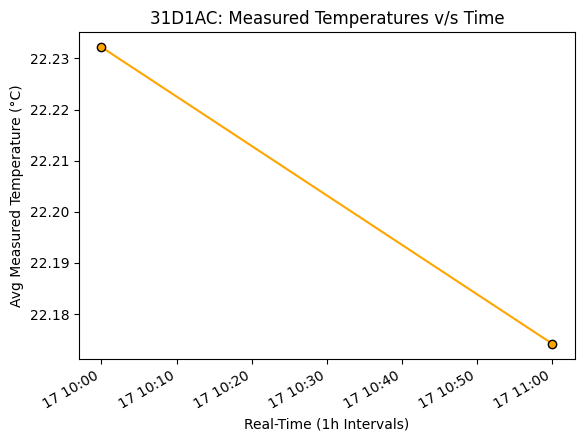

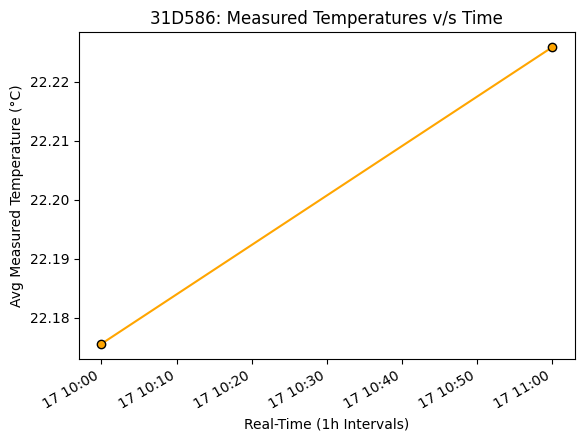

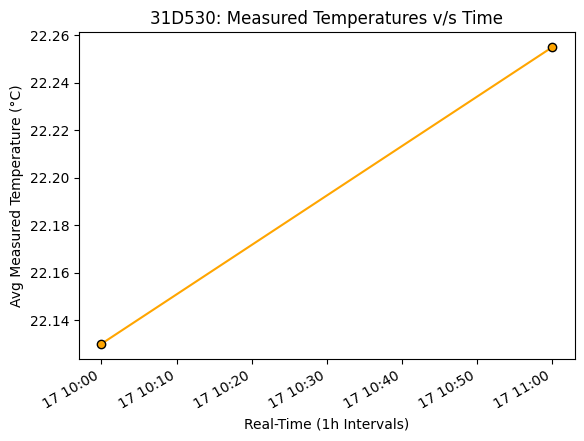

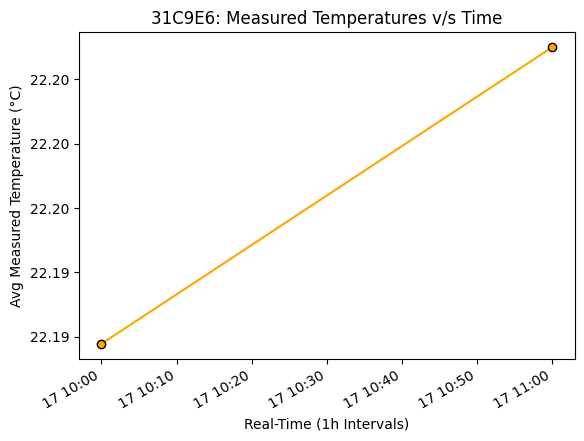

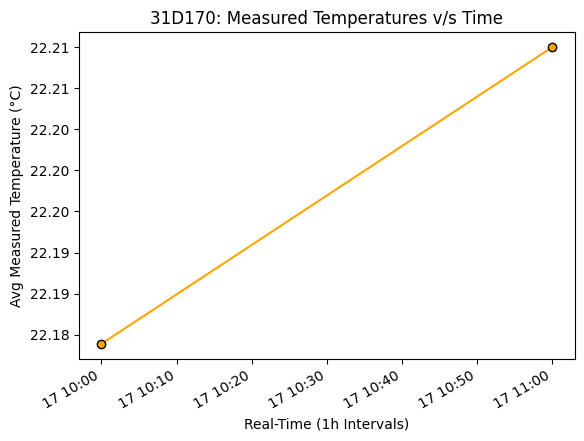

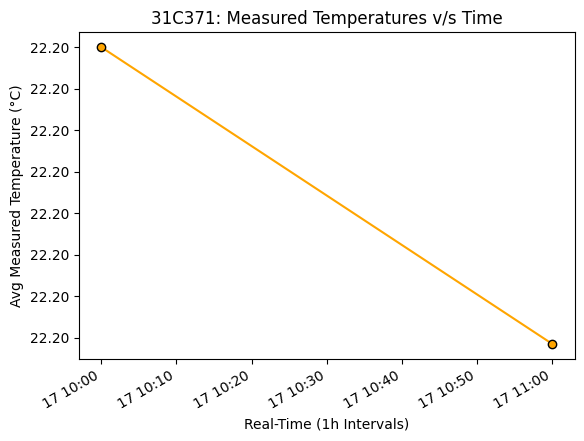

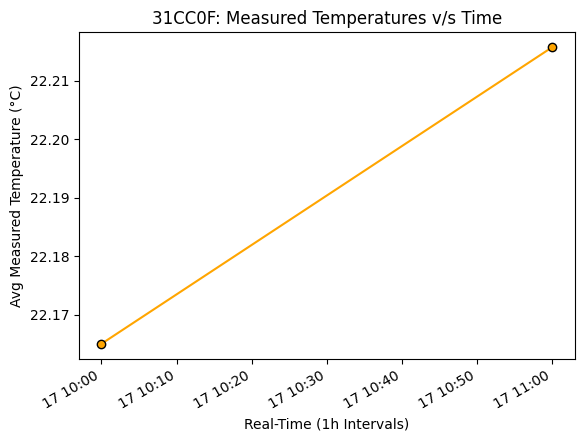

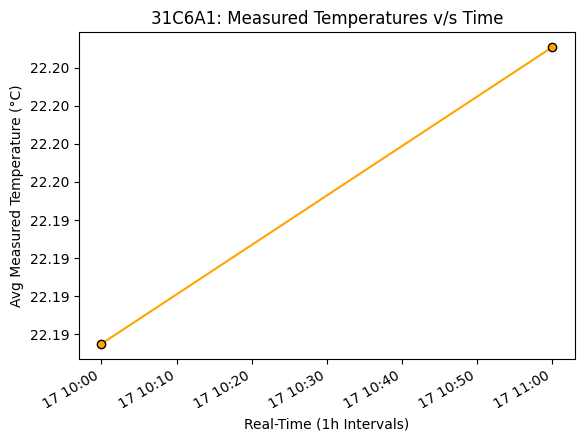

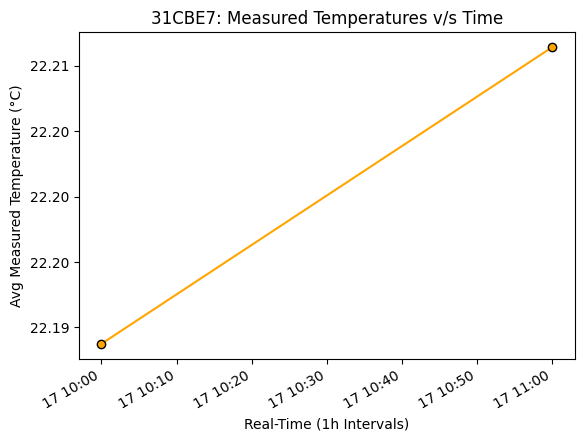

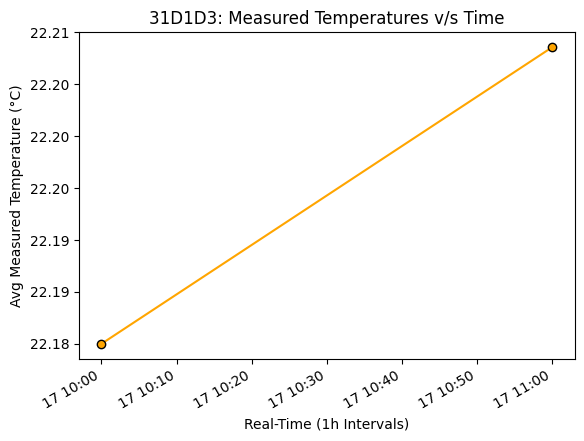

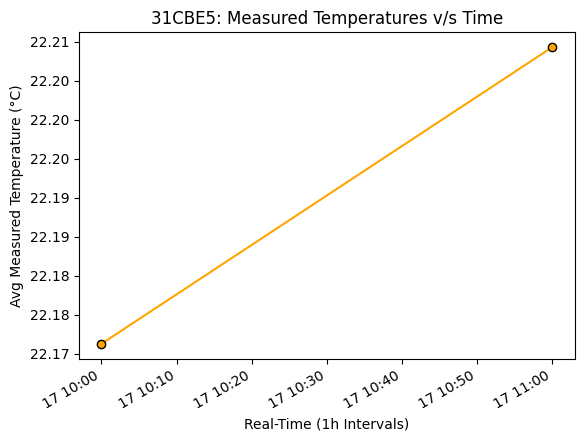

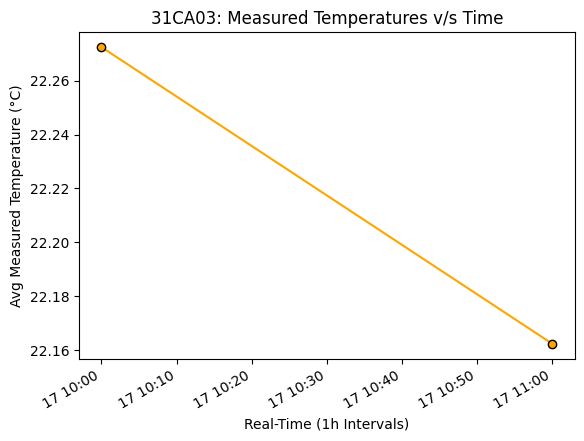

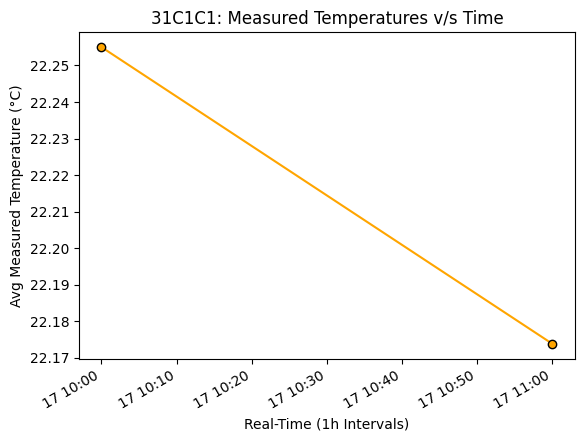

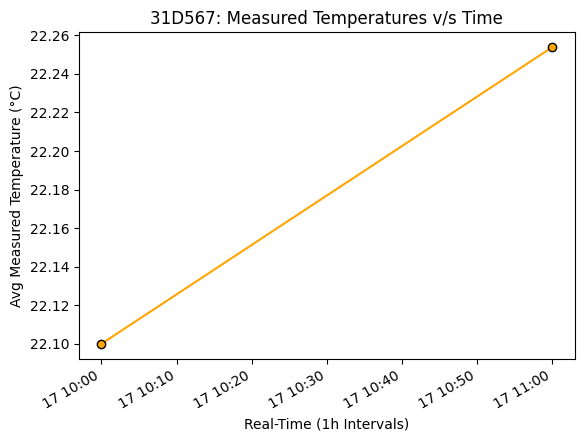

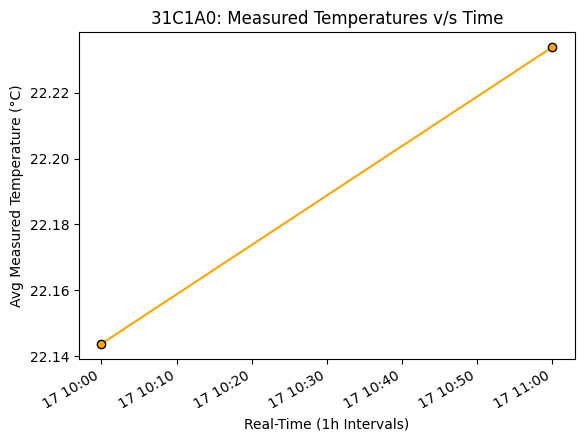

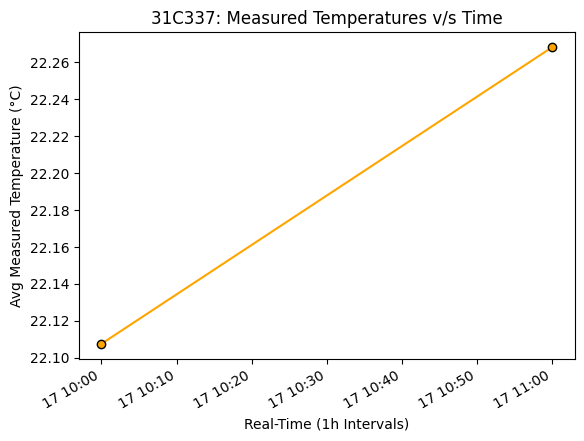

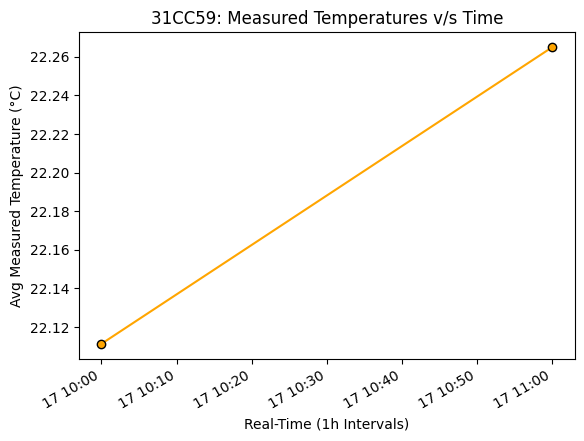

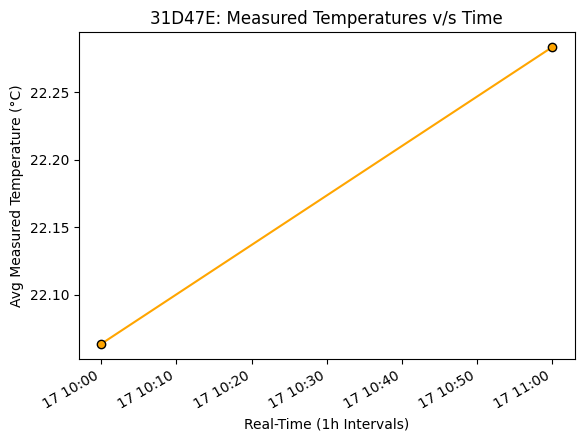

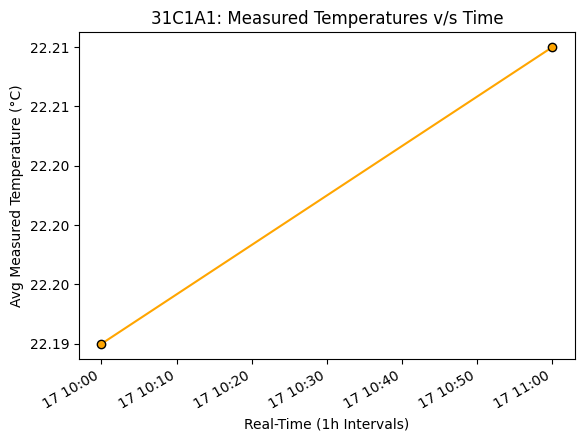

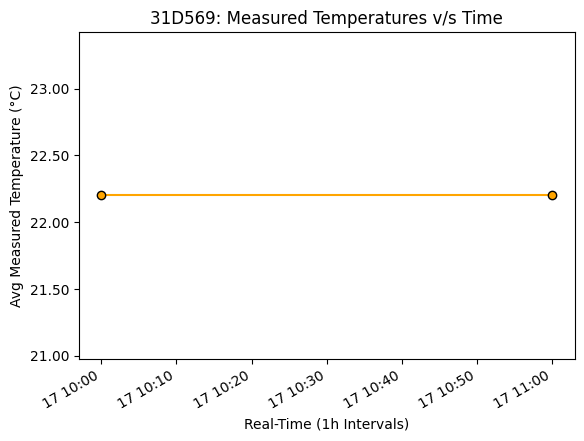

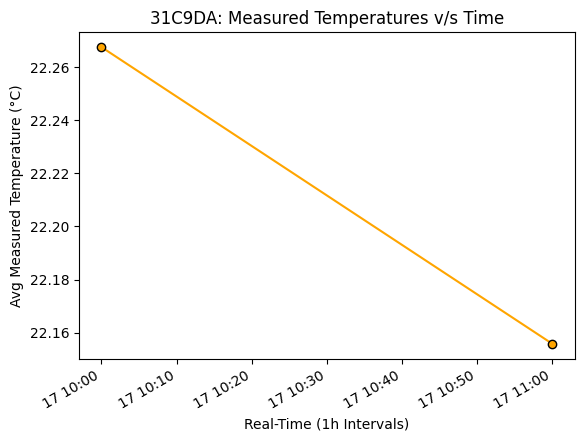

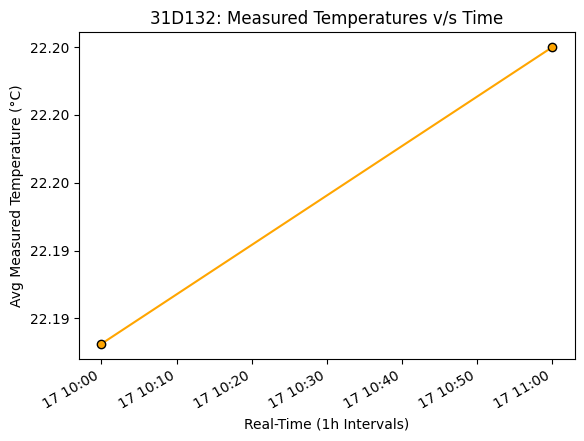

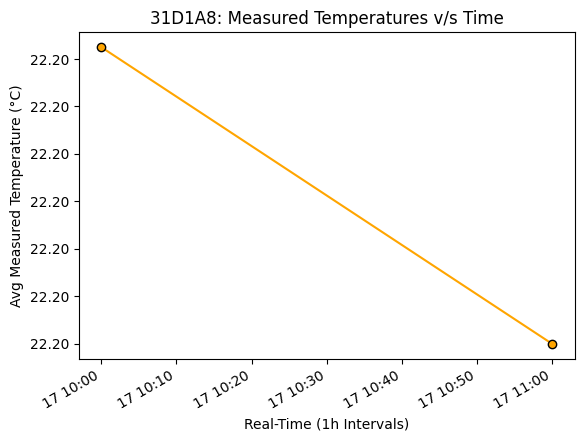

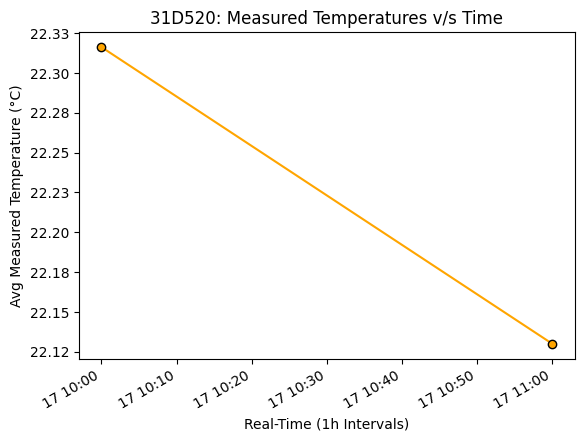

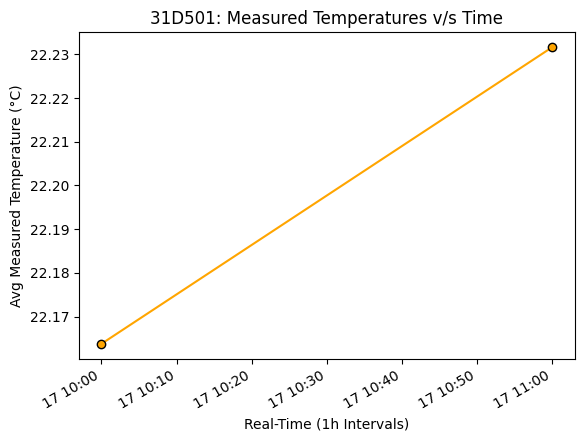

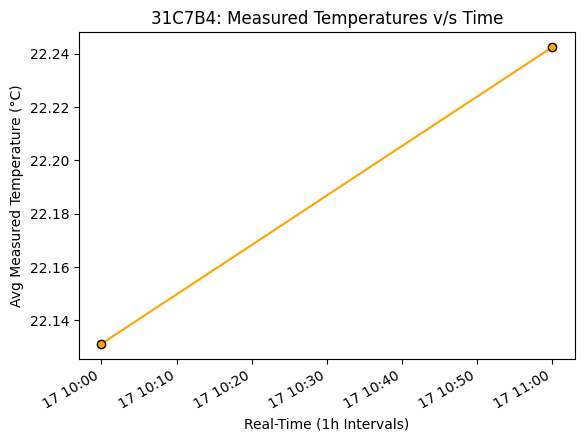

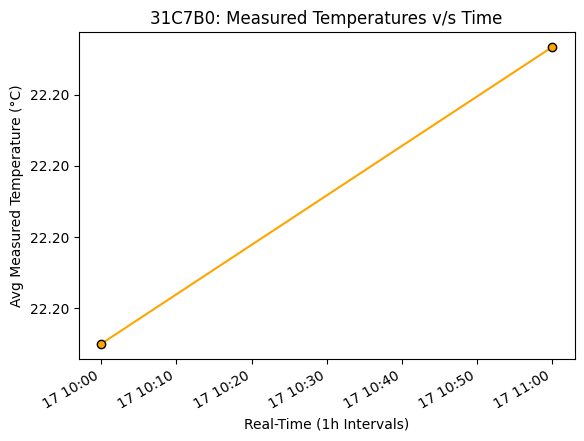

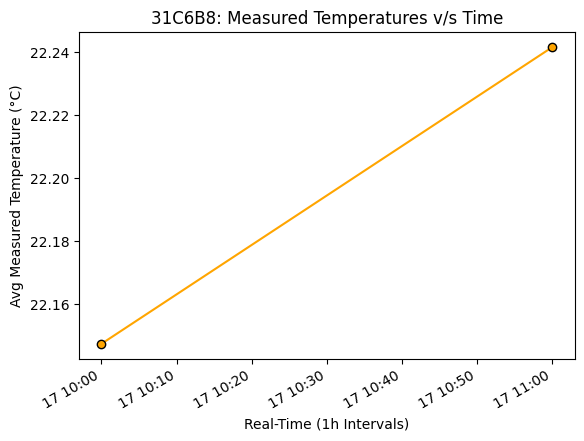

In [9]:
print("Please enter the raw data file")
data_csv = input(">>> ")
dataset, _, _ = get_cropped_dataset(filename=data_csv, N=-1)
compute_dataframes(dataset)
plot_charts(dataset)